In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../"))

In [2]:
import numpy as np
from desc import set_device
set_device("gpu")
from desc.io import load
from desc.examples import get
from desc.plotting import plot_3d
from desc.grid import LinearGrid
import matplotlib.pyplot as plt

In [3]:
eq = get("W7-X")

In [4]:
plot_3d(eq, "|B|")

/CODES/DESC/desc/utils.py:572: UserWarning: Unequal number of field periods for grid 1 and basis 5.
  warnings.warn(msg, err)
/CODES/DESC/desc/utils.py:572: UserWarning: Unequal number of field periods for grid 1 and basis 5.
  warnings.warn(msg, err)


/CODES/DESC/desc/utils.py:572: UserWarning:

Unequal number of field periods for grid 1 and basis 5.

/CODES/DESC/desc/utils.py:572: UserWarning:

Unequal number of field periods for grid 1 and basis 5.



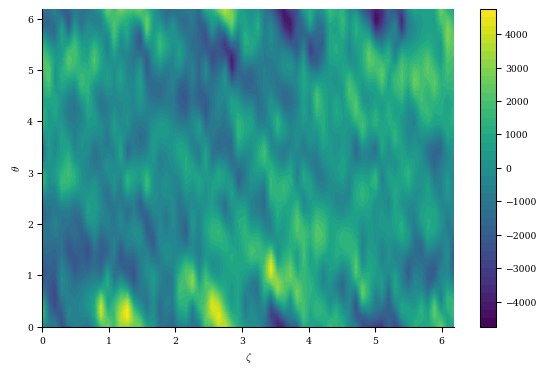

In [7]:
# Calculating j^rho as j.grad(rho)
nn = 64
grid = LinearGrid(rho=1/3, theta=nn, zeta=nn)
data = eq.compute(["J^rho"], grid=grid)
jrho = data["J^rho"].reshape((nn,1,nn), order="F").squeeze()
plt.contourf(grid.nodes[grid.unique_zeta_idx,2], grid.nodes[grid.unique_theta_idx,1], jrho, levels=40)
plt.xlabel("$\\zeta$")
plt.ylabel("$\\theta$")
plt.colorbar();

/CODES/DESC/desc/utils.py:572: UserWarning:

Unequal number of field periods for grid 1 and basis 5.

/CODES/DESC/desc/utils.py:572: UserWarning:

Unequal number of field periods for grid 1 and basis 5.



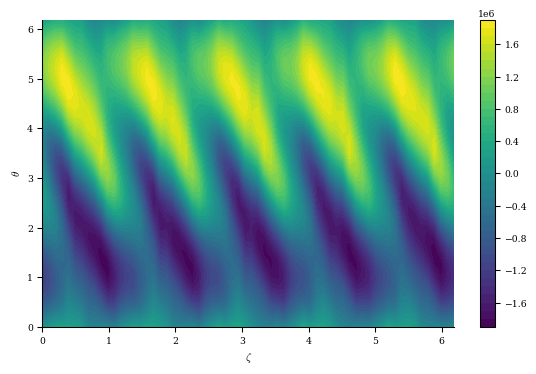

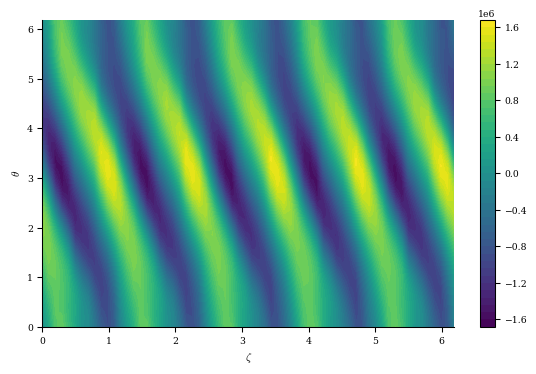

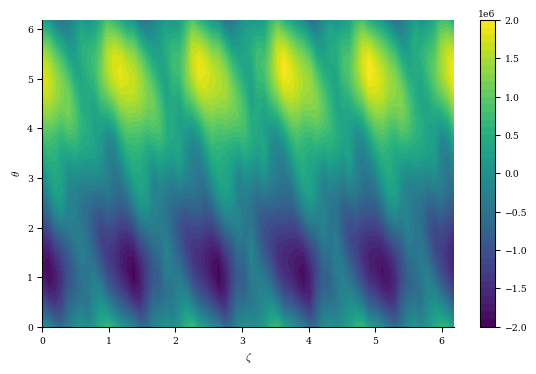

In [14]:
# Calculating j^rho using eq (10) in Alan's notes
mu0 = 4*np.pi*1e-7
data = eq.compute(
    [
        "psi_r",
        "chi_r",
        "sqrt(g)_PEST",
        "(sqrt(g)_PEST_v)|PEST",
        "(sqrt(g)_PEST_p)|PEST",
        "g_vv|PEST",
        "g_vp|PEST",
        "g_pp|PEST",
        "(g_vv_p)|PEST",
        "(g_pp_v)|PEST",
        "e_vartheta",
        "(e_vartheta_v)|PEST",
        "(e_vartheta_p)|PEST",
        "e_phi|r,v",
        "(e_phi_v)|PEST",
        "(e_phi_p)|PEST",
    ],
    grid=grid,
)
g_vp_v = np.sum(data["(e_vartheta_v)|PEST"] * data["e_phi|r,v"], axis=1) + np.sum(
    data["e_vartheta"] * data["(e_phi_v)|PEST"], axis=1
)
g_vp_p = np.sum(data["(e_vartheta_p)|PEST"] * data["e_phi|r,v"], axis=1) + np.sum(
    data["e_vartheta"] * data["(e_phi_p)|PEST"], axis=1
)
g_vv_p = data["(g_vv_p)|PEST"]
g_pp_v = data["(g_pp_v)|PEST"]
# (d(B_phi)/dvartheta)/J
dBpdvJ = (
    (
        -data["(sqrt(g)_PEST_v)|PEST"]
        * (data["g_vp|PEST"] * data["chi_r"] + data["g_pp|PEST"] * data["psi_r"])
        / data["sqrt(g)_PEST"] ** 3
        + g_vp_v * data["chi_r"] / data["sqrt(g)_PEST"] ** 2
        + g_pp_v * data["chi_r"] / data["sqrt(g)_PEST"] ** 2
    )
    .reshape((nn, 1, nn), order="F")
    .squeeze()
)
# (d(B_vartheta)/dphi)/J
dBvdpJ = (
    (
        -data["(sqrt(g)_PEST_p)|PEST"]
        * (data["g_vv|PEST"] * data["chi_r"] + data["g_vp|PEST"] * data["psi_r"])
        / data["sqrt(g)_PEST"] ** 3
        + g_vv_p * data["chi_r"] / data["sqrt(g)_PEST"] ** 2
        + g_vp_p * data["chi_r"] / data["sqrt(g)_PEST"] ** 2
    )
    .reshape((nn, 1, nn), order="F")
    .squeeze()
)
plt.contourf(
    grid.nodes[grid.unique_zeta_idx, 2],
    grid.nodes[grid.unique_theta_idx, 1],
    (dBpdvJ)/mu0,
    levels=40,
)
plt.xlabel("$\\zeta$")
plt.ylabel("$\\theta$")
plt.colorbar();

plt.figure()
plt.contourf(
    grid.nodes[grid.unique_zeta_idx, 2],
    grid.nodes[grid.unique_theta_idx, 1],
    (dBvdpJ) / mu0,
    levels=40,
)
plt.xlabel("$\\zeta$")
plt.ylabel("$\\theta$")
plt.colorbar()

plt.figure()
plt.contourf(
    grid.nodes[grid.unique_zeta_idx, 2],
    grid.nodes[grid.unique_theta_idx, 1],
    (dBpdvJ- dBvdpJ) / mu0,
    levels=40,
)
plt.xlabel("$\\zeta$")
plt.ylabel("$\\theta$")
plt.colorbar()